<a href="https://colab.research.google.com/github/marinasbrum/ExploringNonverbalCommunication/blob/main/Emotional_Responses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação de Pacotes:

In [ ]:
!pip install pandas
!pip install matplotlib

Importação de Bibliotecas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Leitura do arquivo CSV:

In [6]:
file_path = '/content/drive/My Drive/Portfólio/teste.csv'

teste = pd.read_csv(file_path)

Convertendo a coluna para o formato de min:seg :




In [4]:
teste['Time'] = pd.to_datetime(teste['Time'], format='%M:%S').dt.time

Fazendo a contagem dos episódios e olhadas por episódios:

In [78]:
looks_season1 = teste.groupby('Episode').size().reset_index(name='frq')
max_looks = 12

Montando o gráfico da temporada 1:

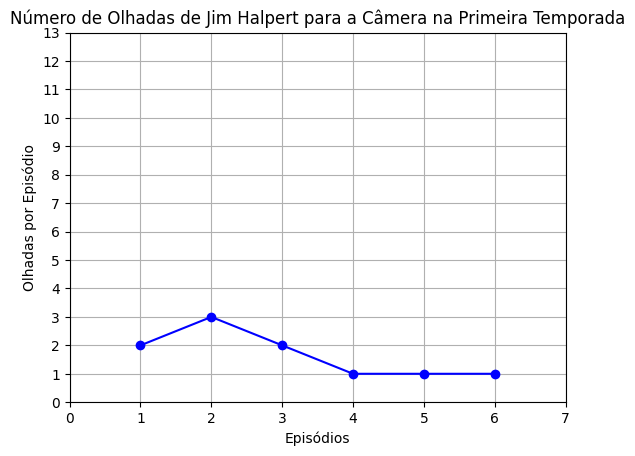

In [79]:
plt.plot(looks_season1['Episode'], looks_season1['frq'], marker='o', linestyle='-', color='b')
plt.xticks(range(len(looks_season1['Episode']) + 2))
plt.yticks(range(0, max_looks + 2))
plt.title('Número de Olhadas de Jim Halpert para a Câmera na Primeira Temporada')
plt.xlabel('Episódios')
plt.ylabel('Olhadas por Episódio')
plt.grid(True)
plt.show()